In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/olegdubetcky/Text-Classification-with-ML-Project/main/news.csv', encoding='utf8')

In [ ]:
df.category.unique()

array(['Коронавірус', 'Політика', 'Події', 'Суспільство', 'Культура',
       'Світ', 'Економіка', 'Думки', 'Екологія', 'Наука', 'Спорт',
       'Історія', 'Технології', 'Транспорт'], dtype=object)

In [ ]:
#перетворіть усі дані у нижній регістр, а потім збережіть їх у форматі списку
corpus = df['title'].apply(lambda x : str(x).lower()).tolist()
#встановити цільові змінні
y = df['category']

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)

#зберегти ветори слів 
pickle.dump(count_vect.vocabulary_, open("feature.pkl","wb"))

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

#перетворення векторів слів до TF IDF
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X_train_counts)

#зберегти TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

In [ ]:
#розділити дані на зразки для навчання та тестування
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

#SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics


#проста функція оцінки
def evaluate(clf, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    
    import seaborn as sns
    
    print('Класифікатор : {}'.format(clf))
    clf.fit(X_train, y_train)
    # Predict Test Data 
    y_pred = clf.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prc = metrics.precision_score(y_test, y_pred, average='macro')
    rec = metrics.recall_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

   
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    print('Метрики : \n')
   # Print result
    print('Точність:', acc)
    print('Влучність:', prc)
    print('Повнота:', rec)
    print('F1 міра:', f1)
    print('Cohens Kappa міра:', kappa)
    print('Матриця невідповідностей:\n', cm)
    
    print('*'*100)
    print('\n\n')
    
    return {'acc': acc, 'prc': prc, 'rec': rec, 'f1': f1, 'kappa': kappa, 'cm': cm}


#ініціалізувати класифікатори
mnb = MultinomialNB()
mlp_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
svm = SVC(decision_function_shape='ovo') #one vs one strategy
lin_svm = LinearSVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 150)

#викликати функцію оцінки, яку ми створили для класифікаторів
evaluate(mnb)


mlp_neural_eval = evaluate(mlp_neural)
svm_eval = evaluate(svm)
lin_svm_eval = evaluate(lin_svm)
dt_eval = evaluate(dt)
rf_eval = evaluate(rf)

Класифікатор : MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Метрики : 

Точність: 0.4550970873786408
Влучність: 0.23602862197510582
Повнота: 0.12687243324034464
F1 міра: 0.1216363205854324
Cohens Kappa міра: 0.18205172421416593
Матриця невідповідностей:
 [[  0   0   0   0   7   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  29   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0  16   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0  25   0   0   0   1   1   0   0   0   0]
 [  0   0   0   0 301   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0  56  11   0   1   0   0   0   0   0   0]
 [  0   0   0   0  18   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0  68   0   0   8   8   0   0   0   0   0]
 [  0   0   0   0  62   0   0   0  49   0   0   0   0   0]
 [  0   0   0   0  52   0   0   4  12   6   0   0   0   0]
 [  0   0   0   0  23   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  47   0   0   1   2   1   0   0   0   0]
 [  0   0   0   0   4  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Метрики : 

Точність: 0.558252427184466
Влучність: 0.3835465629695386
Повнота: 0.36824239569166534
F1 міра: 0.340492033263179
Cohens Kappa міра: 0.47238396127175564
Матриця невідповідностей:
 [[  1   0   4   0   0   0   0   0   0   0   0   1   0   1]
 [  0  21   3   3   1   0   0   1   1   0   0   0   0   0]
 [  0   2   5   4   0   0   0   1   2   0   0   2   0   1]
 [  0   1   1  17   2   1   0   1   2   1   1   0   0   0]
 [  2   1   6  21 263   1   0   0   0   4   0   3   0   1]
 [  9   6  11   1   1  18   0   4   0   0  10   6   0   2]
 [  0   0   7   1   0   0   5   3   0   1   1   0   0   1]
 [  1   2  11  14   1   1   1  24  10   3   9   5   0   2]
 [  0   2   2  20   2   2   0  16  49  12   2   3   0   1]
 [  2   2   7   5   2   1   2  10   8  31   2   1   0   1]
 [  0   0   3   1   0   0   0   4   0   0  14   1   0   0]
 [  1   1  10  14   0   1   0   4   3   2   3  12   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0   0   1]
 [  1   0   1   1   0   0   0   2   0   1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Метрики : 

Точність: 0.5509708737864077
Влучність: 0.4229320460753656
Повнота: 0.19748293428806063
F1 міра: 0.19512781540781954
Cohens Kappa міра: 0.3769936387470395
Матриця невідповідностей:
 [[  0   0   0   0   7   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  23   0   0   1   6   0   0   0   0   0]
 [  0   0   0   0  10   0   0   2   5   0   0   0   0   0]
 [  0   0   0   1  18   1   0   0   6   1   0   0   0   0]
 [  0   0   0   0 298   0   0   0   2   2   0   0   0   0]
 [  0   0   0   0  36  19   0   5   8   0   0   0   0   0]
 [  0   0   0   0  13   0   1   1   2   2   0   0   0   0]
 [  0   0   0   0  33   1   0  24  23   3   0   0   0   0]
 [  0   0   0   0  18   1   0   3  85   4   0   0   0   0]
 [  0   0   0   0  24   0   0   9  16  25   0   0   0   0]
 [  0   0   0   0  14   0   0   4   5   0   0   0   0   0]
 [  0   0   0   0  36   2   0   5   6   1   0   1   0   0]
 [  0   0   0   0   2   0   0   0   1   2   0   0   0   0]
 [  0   0   0   0   4   0   0   1   1  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 1.0)

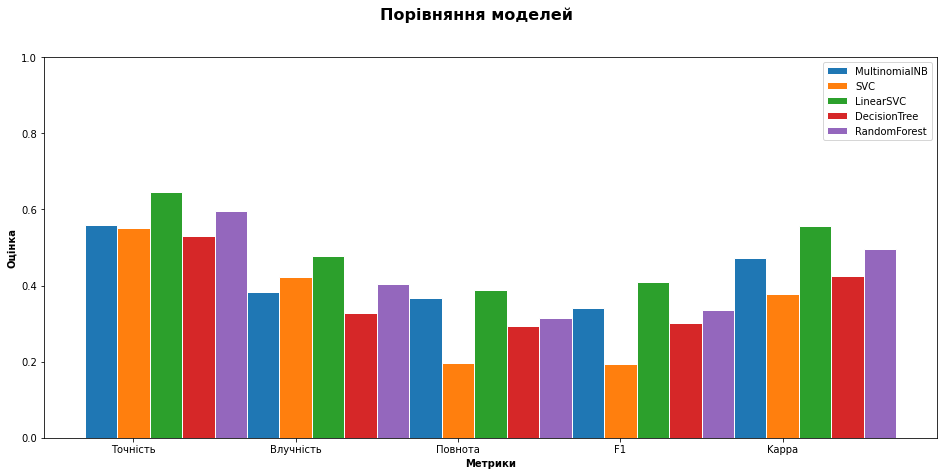

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Порівняння моделей', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(16)
fig.set_facecolor('white')

## set bar size
barWidth = 0.2

mlp_neural_eval_score = [mlp_neural_eval['acc'], mlp_neural_eval['prc'], mlp_neural_eval['rec'], mlp_neural_eval['f1'], mlp_neural_eval['kappa']]
svm_score = [svm_eval['acc'], svm_eval['prc'], svm_eval['rec'], svm_eval['f1'], svm_eval['kappa']]
lin_svm_score = [lin_svm_eval['acc'], lin_svm_eval['prc'], lin_svm_eval['rec'], lin_svm_eval['f1'], lin_svm_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prc'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prc'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(mlp_neural_eval_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, mlp_neural_eval_score, width=barWidth, edgecolor='white', label='MultinomialNB')
ax1.bar(r2, svm_score, width=barWidth, edgecolor='white', label='SVC')
ax1.bar(r3, lin_svm_score, width=barWidth, edgecolor='white', label='LinearSVC')
ax1.bar(r4, dt_score, width=barWidth, edgecolor='white', label='DecisionTree')
ax1.bar(r5, rf_score, width=barWidth, edgecolor='white', label='RandomForest')
plt.legend()
## Configure x and y axis
ax1.set_xlabel('Метрики', fontweight='bold')
labels = ['Точність', 'Влучність', 'Повнота', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.0) for r in range(len(mlp_neural_eval_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Оцінка', fontweight='bold')
ax1.set_ylim(0, 1)

In [ ]:
from sklearn.model_selection import GridSearchCV
#спробуйте налаштувати параметри. Для LinearSVC C є регульованим параметром
params = {'C': [0.1, 1, 10, 100, 1000]}
#використовувати клас GridSearchCV. Основними аргументами є (класифікатор, параметри), для яких ми хочемо виконати найкращий пошук параметрів.
grid = GridSearchCV(LinearSVC(), params, refit=True, verbose=3)
#пристосувати дані навчання до нашої моделі grid_search та перевірити прогнози на нашому тестовому наборі
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
#Перевірте точність і влучність нашої моделі
print('Точність : {:.2f}%'.format(100*metrics.accuracy_score(y_pred, y_test)))
print('Влучність : \n{}'.format(100*metrics.precision_score(y_pred, y_test, average = None)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.557, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.551, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.557, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.563, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.546, total=   0.0s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................................. C=1, score=0.611, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.626, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.634, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.628, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.635, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.595, total=   0.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.617, total=   0.2s
[CV] C=10 ............................................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.593, total=   0.5s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.613, total=   0.6s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.640, total=   0.6s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.613, total=   0.5s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.629, total=   0.6s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.593, total=   0.2s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.613, total=   0.4s
[CV] C=1000 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.0s finished


In [ ]:
import pickle

#зберегти модель категорії

pickle.dump(grid, open('LinearSVM_model.pkl', 'wb'))

# завнтажити модель категорії та перевірити
tuned_model = pickle.load(open('LinearSVM_model.pkl', 'rb'))
result = tuned_model.score(X_test, y_test)*100

print('Точність : {:.2f}%'.format(result)) 

loaded_vec = CountVectorizer(vocabulary=pickle.load(open("feature.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("LinearSVM_model.pkl","rb"))

docs_new = "Макрон планує знову обговорити з Путіним ситуацію в Україні"
X_new_counts = loaded_vec.transform([docs_new])
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)
print('Категорія: ', predicted[0])



Точність : 64.68%
Категорія:  Політика
